# Analysis of SEIRX model runs for vaccination prevalence

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import analysis_functions as af
import seaborn as sns

In [22]:
language = 'english' # English or German
vaccination_ratios = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
index_cases = ['employee', 'resident']

## Analysis B.1.1.7

### Data loading and wrangling

In [23]:
res_path = '../data/simulation_results'
dst_path = '../plots'
N_runs = 5000
sim_name = 'simulations_vaccination_rate_UK_variant_{}.csv'.format(N_runs)

In [24]:
data = pd.read_csv(join(res_path, sim_name))

data = data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio'])

### Plot heatmap

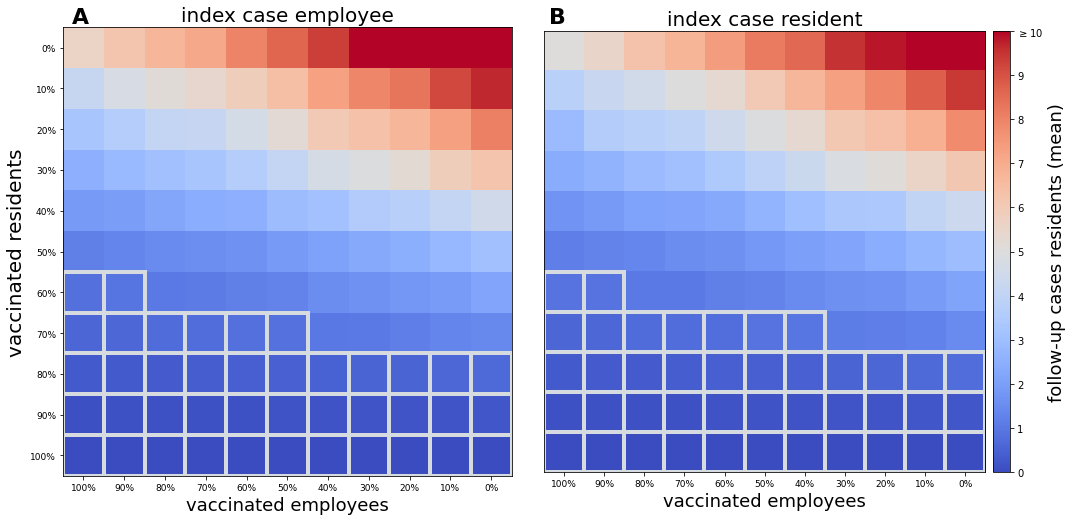

In [25]:
metric = 'infected_residents_mean'
af.plot_vaccination_heatmap(data, metric, vaccination_ratios, language, 
                            variant='_UK_variant')

### Plot employee vaccination

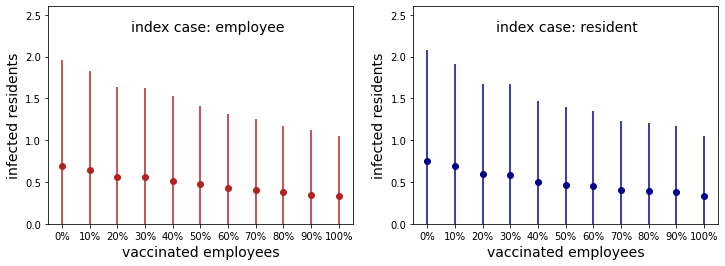

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['FireBrick', 'DarkBlue']

for index_case, ax, color in zip(index_cases, axes, colors):
    subset = data.loc[index_case, :, 0.8].copy()
    if index_case == 'resident':
        subset['infected_residents_mean'] -= 1
    ax.errorbar(subset.index.get_level_values('employee_vaccination_ratio') * 100, 
                subset['infected_residents_mean'], color=color,
                yerr=subset['infected_residents_std'], fmt='o')
    
    ax.text(25, 2.3, 'index case: {}'.format(index_case), fontsize=14)
    ax.set_ylim(0, 2.6)
    ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
    xticks = range(0, 101, 10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(['{}%'.format(i) for i in xticks])
    ax.set_xlabel('vaccinated employees', fontsize=14)
    ax.set_ylabel('infected residents', fontsize=14)
    #ax.plot([-2, 102], [0.5, 0.5], '--', color='grey')
    
plt.savefig('../plots/employee_vaccination_rate_UK_variant_{}.pdf'.format(language[0:3]))
plt.savefig('../plots/employee_vaccination_rate_UK_variant_{}.png'.format(language[0:3]))

### Outbreak sizes

#### Employee 50%, resident 0%

In [27]:
mean = data.loc['employee', 0.5, 0.0]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

8.5944 +- 9.59044753787827


In [28]:
mean = data.loc['resident', 0.5, 0.0]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

8.1954 +- 9.225911463289991


#### Employee 0%, resident 50%

In [29]:
mean = data.loc['employee', 0.0, 0.5]['infected_residents_mean']
std = data.loc['employee', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

3.0936 +- 4.16392923827246


In [30]:
mean = data.loc['resident', 0.0, 0.5]['infected_residents_mean'] - 1
std = data.loc['resident', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

2.995 +- 4.013950343423781


#### Employee 0%, resident 90%

In [31]:
mean = data.loc['employee', 0.0, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.0, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.2512 +- 0.570055745265796


In [32]:
mean = data.loc['resident', 0.0, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.0, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.264 +- 0.5919240448021713


#### Employee 50%, resident 90%

In [33]:
mean = data.loc['employee', 0.5, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.168 +- 0.4580589084306936


In [34]:
mean = data.loc['resident', 0.5, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.17599999999999993 +- 0.4628896773213614


#### Employee 90%, resident 90%

In [35]:
mean = data.loc['employee', 0.9, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1228 +- 0.3732934899056253


In [36]:
mean = data.loc['resident', 0.9, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.13139999999999996 +- 0.391618070245218


## Analysis wild type

### Data loading and wrangling

In [37]:
res_path = '../data/simulation_results'
dst_path = '../plots'
N_runs = 5000
sim_name = 'simulations_vaccination_rate_{}.csv'.format(N_runs)

In [38]:
data = pd.read_csv(join(res_path, sim_name))

data = data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio'])

### Plot heatmap

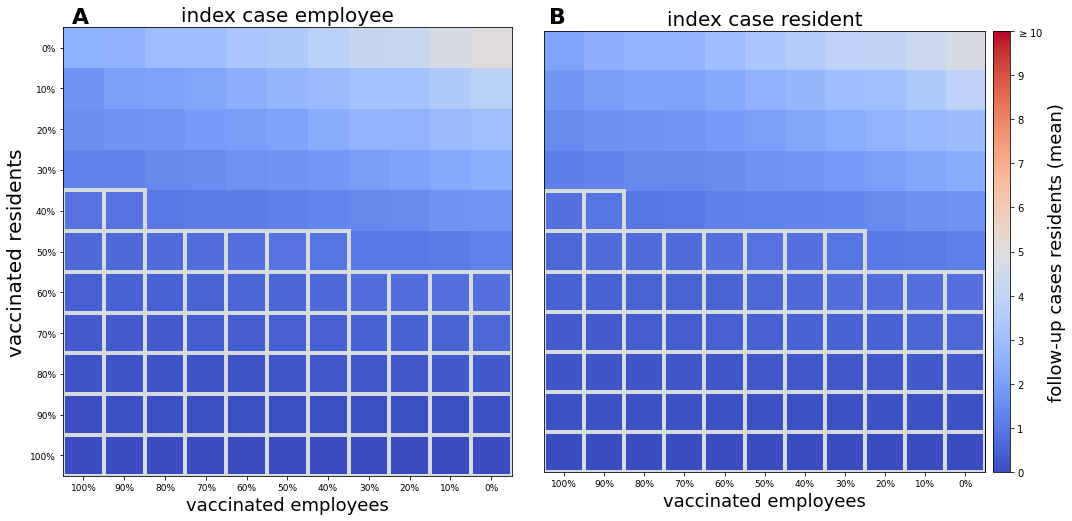

In [39]:
metric = 'infected_residents_mean'
af.plot_vaccination_heatmap(data, metric, vaccination_ratios, language, 
                            variant='')

### Plot employee vaccination

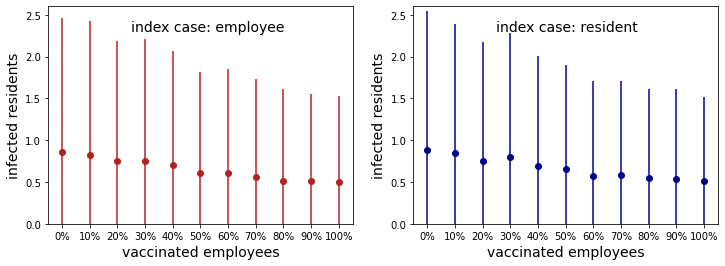

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['FireBrick', 'DarkBlue']

for index_case, ax, color in zip(index_cases, axes, colors):
    subset = data.loc[index_case, :, 0.6].copy()
    if index_case == 'resident':
        subset['infected_residents_mean'] -= 1
    ax.errorbar(subset.index.get_level_values('employee_vaccination_ratio') * 100, 
                subset['infected_residents_mean'], color=color,
                yerr=subset['infected_residents_std'], fmt='o')
    
    ax.text(25, 2.3, 'index case: {}'.format(index_case), fontsize=14)
    ax.set_ylim(0, 2.6)
    ax.set_yticks([0, 0.5, 1, 1.5, 2.0, 2.5])
    xticks = range(0, 101, 10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(['{}%'.format(i) for i in xticks])
    ax.set_xlabel('vaccinated employees', fontsize=14)
    ax.set_ylabel('infected residents', fontsize=14)
    #ax.plot([-2, 102], [0.5, 0.5], '--', color='grey')
    
plt.savefig('../plots/employee_vaccination_rate_{}.pdf'.format(language[0:3]))
plt.savefig('../plots/employee_vaccination_rate_{}.png'.format(language[0:3]))

### Outbreak sizes

#### Employee 50%, resident 0%

In [41]:
mean = data.loc['employee', 0.5, 0.0]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

3.4626 +- 5.270043255152868


In [42]:
mean = data.loc['resident', 0.5, 0.0]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

3.3242000000000003 +- 4.981009581529658


#### Employee 0%, resident 50%

In [43]:
mean = data.loc['employee', 0.0, 0.5]['infected_residents_mean']
std = data.loc['employee', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.3162 +- 2.290953350343627


In [44]:
mean = data.loc['resident', 0.0, 0.5]['infected_residents_mean'] - 1
std = data.loc['resident', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.2233999999999998 +- 2.115936643091072


#### Employee 50%, resident 90%

In [45]:
mean = data.loc['employee', 0.5, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0922 +- 0.3176780506562796


In [46]:
mean = data.loc['resident', 0.5, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.09699999999999998 +- 0.3193922389170658


#### Employee 90%, resident 90%

In [47]:
mean = data.loc['employee', 0.9, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.079 +- 0.2972821476898117


In [48]:
mean = data.loc['resident', 0.9, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.08679999999999999 +- 0.3106204388178638


## Analysis B.1.1.7 & employee masks

### Data loading and wrangling

In [49]:
res_path = '../data/simulation_results'
dst_path = '../plots'
N_runs = 5000
sim_name = 'simulations_vaccination_rate_masks_{}.csv'.format(N_runs)

In [50]:
data = pd.read_csv(join(res_path, sim_name))

data = data.set_index(['index_case', 'employee_vaccination_ratio',
                       'resident_vaccination_ratio'])

### Plot heatmap

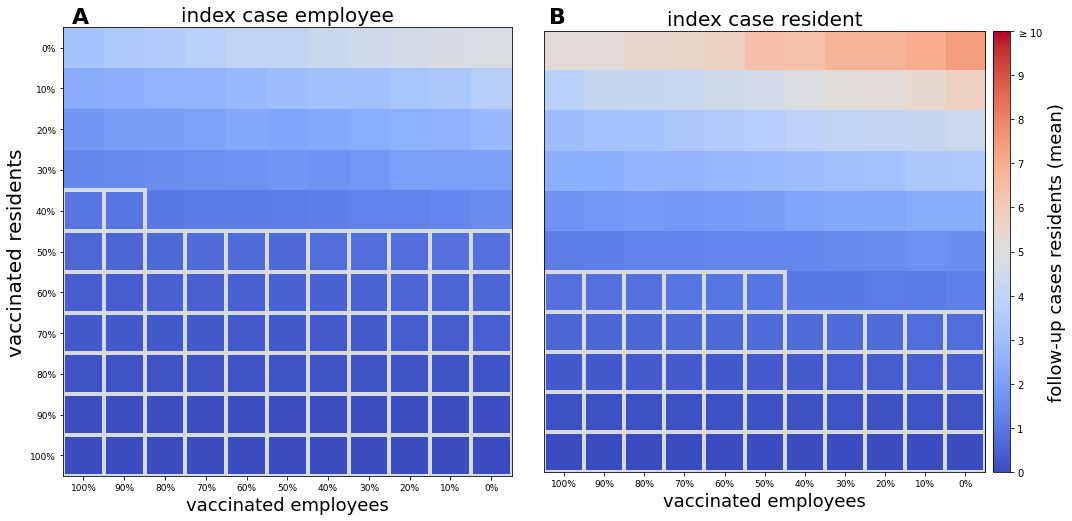

In [51]:
metric = 'infected_residents_mean'
af.plot_vaccination_heatmap(data, metric, vaccination_ratios, language, 
                            variant='_masks')

### Plot employee vaccination

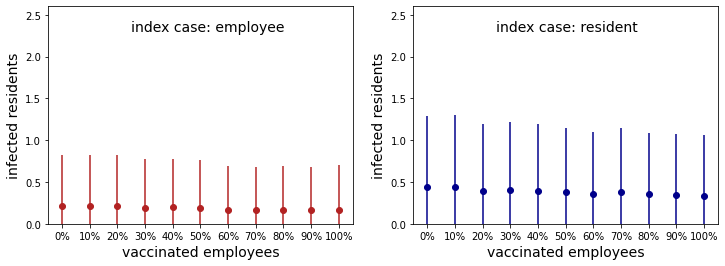

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
colors = ['FireBrick', 'DarkBlue']

for index_case, ax, color in zip(index_cases, axes, colors):
    subset = data.loc[index_case, :, 0.8].copy()
    if index_case == 'resident':
        subset['infected_residents_mean'] -= 1
    ax.errorbar(subset.index.get_level_values('employee_vaccination_ratio') * 100, 
                subset['infected_residents_mean'], color=color,
                yerr=subset['infected_residents_std'], fmt='o')
    
    ax.text(25, 2.3, 'index case: {}'.format(index_case), fontsize=14)
    ax.set_ylim(0, 2.6)
    ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5])
    xticks = range(0, 101, 10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(['{}%'.format(i) for i in xticks])
    ax.set_xlabel('vaccinated employees', fontsize=14)
    ax.set_ylabel('infected residents', fontsize=14)
    #ax.plot([-2, 102], [0.5, 0.5], '--', color='grey')
    
plt.savefig('../plots/employee_vaccination_rate_masks_{}.pdf'.format(language[0:3]))
plt.savefig('../plots/employee_vaccination_rate_masks_{}.png'.format(language[0:3]))

### Outbreak sizes

#### Employee 50%, resident 0%

In [53]:
mean = data.loc['employee', 0.5, 0.0]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

4.0852 +- 7.01682179605721


In [54]:
mean = data.loc['resident', 0.5, 0.0]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.0]['infected_residents_std']
print('{} +- {}'.format(mean, std))

6.3866 +- 7.706115576829658


#### Employee 0%, resident 50%

In [55]:
mean = data.loc['employee', 0.0, 0.5]['infected_residents_mean']
std = data.loc['employee', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.8552 +- 1.962805003227814


In [56]:
mean = data.loc['resident', 0.0, 0.5]['infected_residents_mean'] - 1
std = data.loc['resident', 0.0, 0.5]['infected_residents_std']
print('{} +- {}'.format(mean, std))

1.5692 +- 2.435240735427998


#### Employee 0%, resident 90%

In [57]:
mean = data.loc['employee', 0.0, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.0, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0756 +- 0.2937718508980668


In [58]:
mean = data.loc['resident', 0.0, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.0, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1594 +- 0.4317741606270077


#### Employee 50%, resident 90%

In [59]:
mean = data.loc['employee', 0.5, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.075 +- 0.3003215586795619


In [60]:
mean = data.loc['resident', 0.5, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.5, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.1379999999999999 +- 0.3941916759845178


#### Employee 90%, resident 90%

In [61]:
mean = data.loc['employee', 0.9, 0.9]['infected_residents_mean']
std = data.loc['employee', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.0648 +- 0.2789561315057637


In [62]:
mean = data.loc['resident', 0.9, 0.9]['infected_residents_mean'] - 1
std = data.loc['resident', 0.9, 0.9]['infected_residents_std']
print('{} +- {}'.format(mean, std))

0.12280000000000002 +- 0.3646186354944985
